<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-geomechanics/blob/master/homework%203/homework3_reservoir_geomechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 3**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!git clone https://www.github.com/yohanesnuwara/reservoir-geomechanics

Cloning into 'reservoir-geomechanics'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 81 (delta 35), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (81/81), done.


## Part 1. Estimate UCS for the given depths using known empirical relations

### Task 1. Calculate Barnett Young's Modulus from given density data in Homework 1 and sonic data in Homework 3

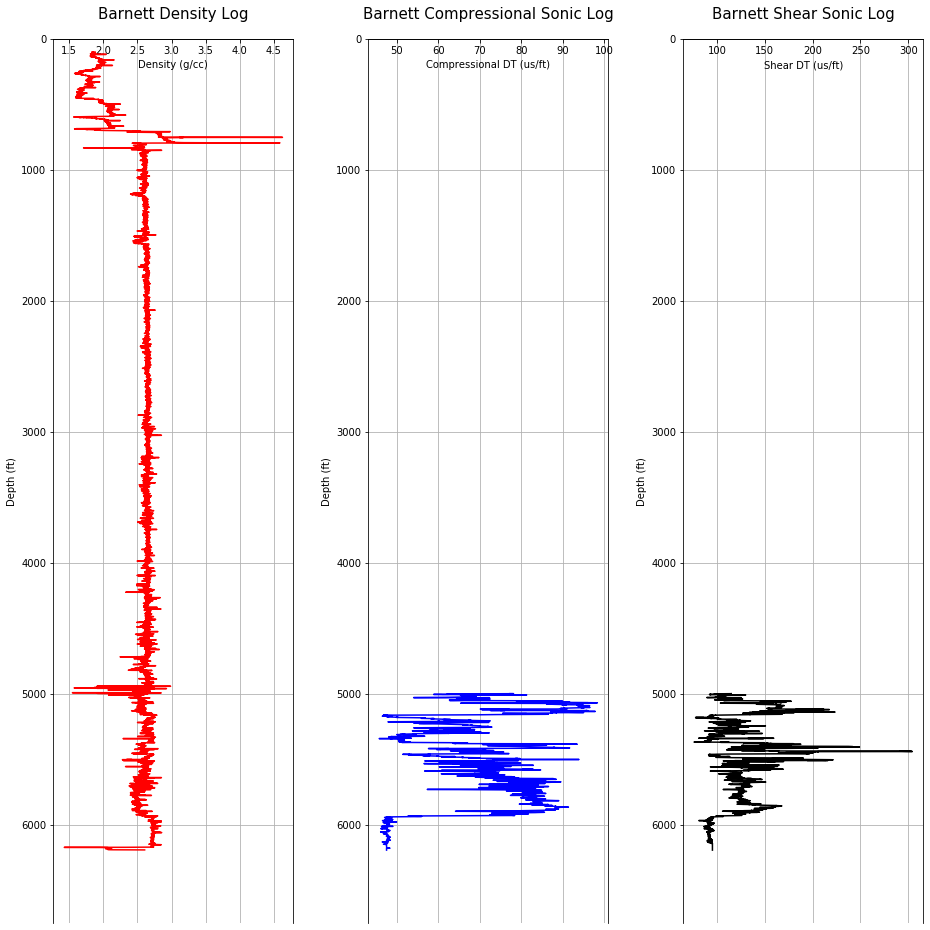

In [0]:
# access density data 
hw1 = np.loadtxt('/content/reservoir-geomechanics/homework 1/Barnett shale data.txt')
depth_barnett_hw1 =hw1[:, 0]; rho_barnett = hw1[:, 1]

# access sonic data
hw3 = pd.read_csv('/content/reservoir-geomechanics/homework 3/Barnett_sonic_logs.csv')
depth_barnett_hw3 = np.array(hw3.iloc[:,0])
dtc_barnett = np.array(hw3.iloc[:,1])
dts_barnett = np.array(hw3.iloc[:,2])

# visualize data
plt.figure(figsize=(13, 13))

plt.subplot(1,3,1)
plt.plot(rho_barnett, depth_barnett_hw1, 'r')
plt.title("Barnett Density Log", pad=20, size=15)
plt.xlabel("Density (g/cc)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6750)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1,3,2)
plt.plot(dtc_barnett, depth_barnett_hw3, color='blue')
plt.title("Barnett Compressional Sonic Log", pad=20, size=15)
plt.xlabel("Compressional DT (us/ft)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6750)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1,3,3)
plt.plot(dts_barnett, depth_barnett_hw3, color='black')
plt.title("Barnett Shear Sonic Log", pad=20, size=15)
plt.xlabel("Shear DT (us/ft)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6750)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) # set distance between two plots

In [0]:
# data prepro
# cut the density data to depth of barnett sonic logs

print("Minimum depth of barnett sonic log:", min(depth_barnett_hw3), "ft, and maximum depth:", max(depth_barnett_hw3), "ft.")

# Get the index of elements where it will be clipped
clip_low = np.int64(np.where(depth_barnett_hw1 == min(depth_barnett_hw3)))
clip_high = np.int64(np.where(depth_barnett_hw1 == max(depth_barnett_hw3)))
clip_low = clip_low.item()
clip_high = clip_high.item()
print("Clip the density data starts at depth:", min(depth_barnett_hw3), "ft exactly at index:", clip_low, "and ends at depth:", max(depth_barnett_hw3), "ft exactly at index:", clip_high)

Minimum depth of barnett sonic log: 5000.0 ft, and maximum depth: 6195.0 ft.
Clip the density data starts at depth: 5000.0 ft exactly at index: 9799 and ends at depth: 6195.0 ft exactly at index: 12189


In [0]:
# clip the data from index to index in numpy format, if pandas using df.iloc[low:high] method
hw1_clipped = hw1[clip_low:(clip_high+1)]

depth_barnett = hw1_clipped[:, 0]; rho_barnett = hw1_clipped[:, 1]

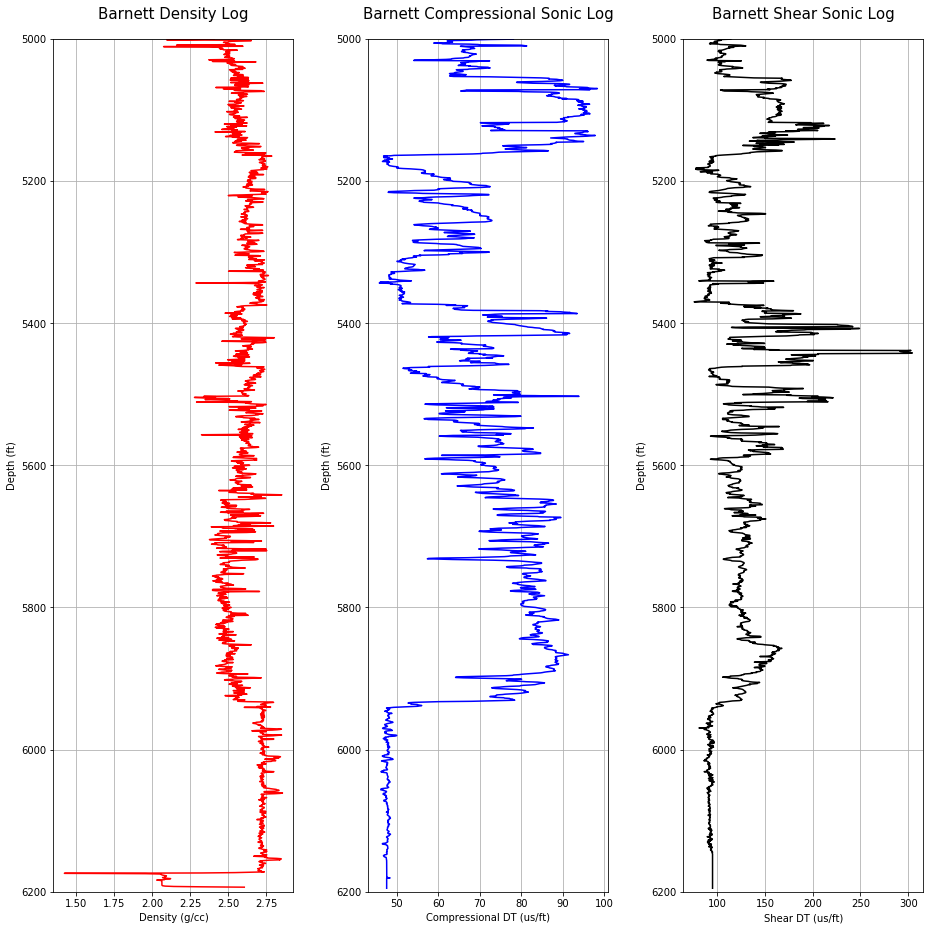

In [0]:
# visualized again the clipped/cropped density-sonic data
plt.figure(figsize=(13, 13))

plt.subplot(1,3,1)
plt.plot(rho_barnett, depth_barnett, 'r')
plt.title("Barnett Density Log", pad=20, size=15)
plt.xlabel("Density (g/cc)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()
# plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1,3,2)
plt.plot(dtc_barnett, depth_barnett, color='blue')
plt.title("Barnett Compressional Sonic Log", pad=20, size=15)
plt.xlabel("Compressional DT (us/ft)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()
# plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1,3,3)
plt.plot(dts_barnett, depth_barnett, color='black')
plt.title("Barnett Shear Sonic Log", pad=20, size=15)
plt.xlabel("Shear DT (us/ft)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()
# plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) # set distance between two plots

In [0]:
# convert depth time to velocity
# vp = ((10^6 / dtc) * 0.3048); dtc in us/ft, vp in m/s
vp_barnett = ((1E+06 / dtc_barnett) * 0.3048)
vs_barnett = ((1E+06 / dts_barnett) * 0.3048)

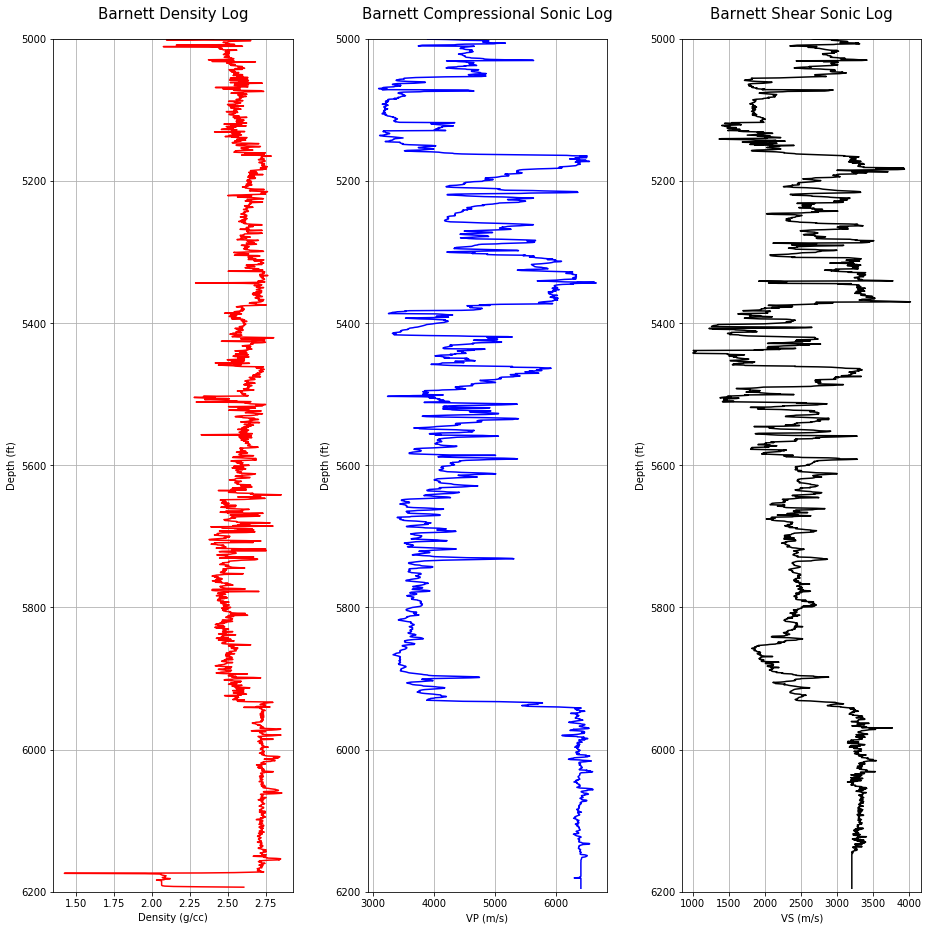

In [0]:
# visualize the density and sonic-converted data
plt.figure(figsize=(13, 13))

plt.subplot(1,3,1)
plt.plot(rho_barnett, depth_barnett, 'r')
plt.title("Barnett Density Log", pad=20, size=15)
plt.xlabel("Density (g/cc)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()
# plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1,3,2)
plt.plot(vp_barnett, depth_barnett, color='blue')
plt.title("Barnett Compressional Sonic Log", pad=20, size=15)
plt.xlabel("VP (m/s)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()
# plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1,3,3)
plt.plot(vs_barnett, depth_barnett, color='black')
plt.title("Barnett Shear Sonic Log", pad=20, size=15)
plt.xlabel("VS (m/s)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()
# plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) # set distance between two plots

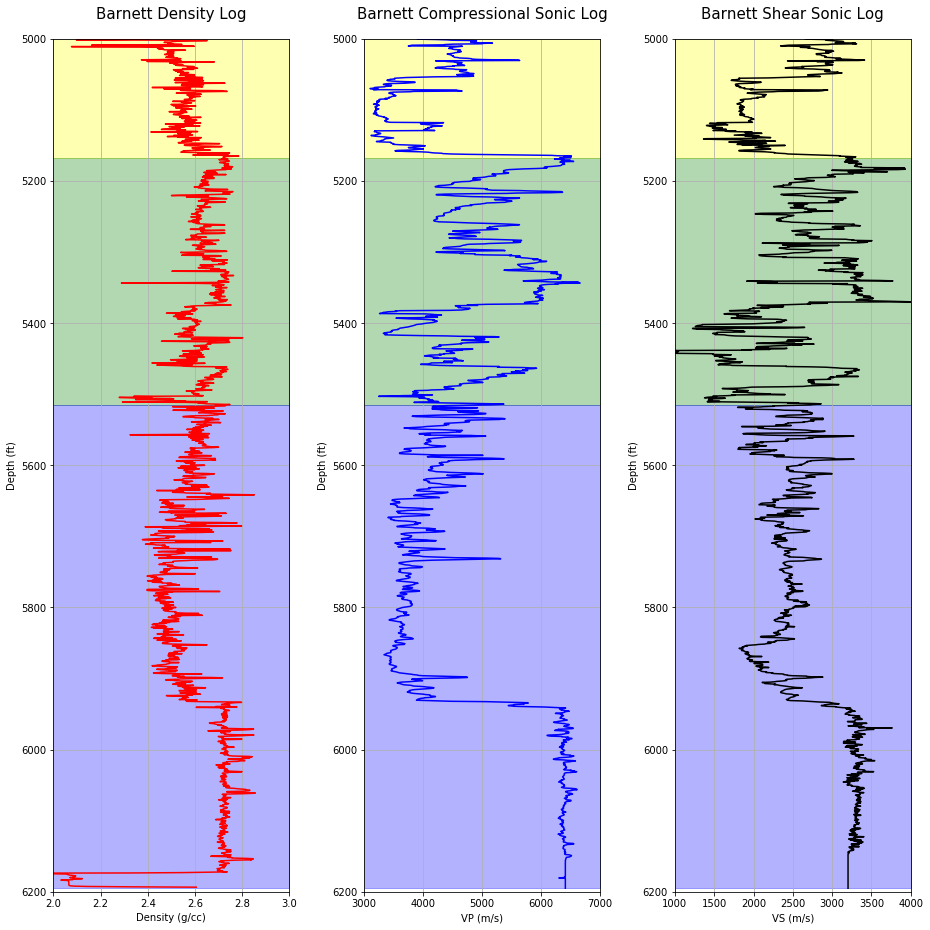

In [0]:
# visualize the top formation names on the log
topnames = ['Marble Falls', 'Duffer', 'Barnett']
topdepth = [5000, 5167.5, 5514.5]

# id_marble = np.int64(np.where(depth_barnett == topdepth[0])).item()
# id_duffer = np.int64(np.where(depth_barnett == topdepth[1])).item()
# id_barnett = np.int64(np.where(depth_barnett == topdepth[2])).item()

plt.figure(figsize=(13, 13))

plt.subplot(1,3,1)
plt.plot(rho_barnett, depth_barnett, 'r')
plt.fill_between([2, 3], topdepth[0], topdepth[1], color='yellow', alpha=0.3) # marble falls zone
plt.fill_between([2, 3], topdepth[1], topdepth[2], color='green', alpha=0.3) # duffer zone
plt.fill_between([2, 3], topdepth[2], 6195, color='blue', alpha=0.3) # barnett zone
plt.title("Barnett Density Log", pad=20, size=15)
plt.xlabel("Density (g/cc)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.xlim(2, 3)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()
# plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1,3,2)
plt.plot(vp_barnett, depth_barnett, color='blue')
plt.fill_between([3000, 7000], topdepth[0], topdepth[1], color='yellow', alpha=0.3) # marble falls zone
plt.fill_between([3000, 7000], topdepth[1], topdepth[2], color='green', alpha=0.3) # duffer zone
plt.fill_between([3000, 7000], topdepth[2], 6195, color='blue', alpha=0.3) # barnett zone
plt.title("Barnett Compressional Sonic Log", pad=20, size=15)
plt.xlabel("VP (m/s)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.xlim(3000, 7000)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()
# plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1,3,3)
plt.plot(vs_barnett, depth_barnett, color='black')
plt.fill_between([1000, 4000], topdepth[0], topdepth[1], color='yellow', alpha=0.3) # marble falls zone
plt.fill_between([1000, 4000], topdepth[1], topdepth[2], color='green', alpha=0.3) # duffer zone
plt.fill_between([1000, 4000], topdepth[2], 6195, color='blue', alpha=0.3) # barnett zone
plt.title("Barnett Shear Sonic Log", pad=20, size=15)
plt.xlabel("VS (m/s)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.xlim(1000, 4000)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()
# plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) # set distance between two plots

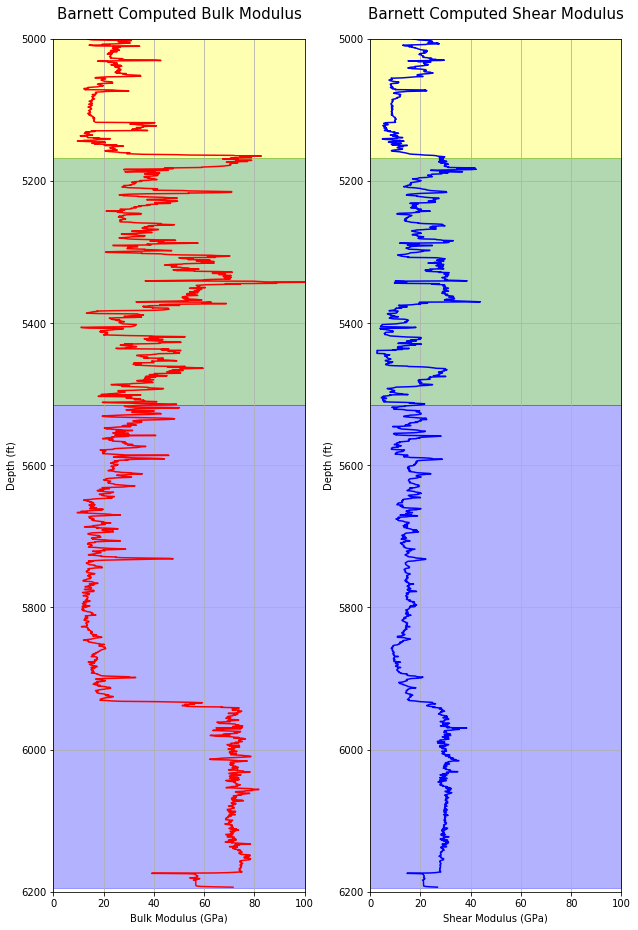

In [0]:
# derive shear (G) and bulk (K) modulus from rho, vp, vs

# convert rho from g/cc to kg/m3
rho_barnett_conv = rho_barnett * 1E+03

# calculate G (result in GPa)
G_barnett = rho_barnett_conv *(vs_barnett**2) / (1E+09)
# calculate K (result in GPa)
K_barnett = rho_barnett_conv * ((vp_barnett**2) - ((4/3) * (vs_barnett**2))) / (1E+09)

plt.figure(figsize=(9, 13))

plt.subplot(1,2,1)
plt.plot(K_barnett, depth_barnett, 'r')
plt.fill_between([0, 100], topdepth[0], topdepth[1], color='yellow', alpha=0.3) # marble falls zone
plt.fill_between([0, 100], topdepth[1], topdepth[2], color='green', alpha=0.3) # duffer zone
plt.fill_between([0, 100], topdepth[2], 6195, color='blue', alpha=0.3) # barnett zone
plt.title("Barnett Computed Bulk Modulus", pad=20, size=15)
plt.xlabel("Bulk Modulus (GPa)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()
# plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1,2,2)
plt.plot(G_barnett, depth_barnett, color='blue')
plt.fill_between([0, 100], topdepth[0], topdepth[1], color='yellow', alpha=0.3) # marble falls zone
plt.fill_between([0, 100], topdepth[1], topdepth[2], color='green', alpha=0.3) # duffer zone
plt.fill_between([0, 100], topdepth[2], 6195, color='blue', alpha=0.3) # barnett zone
plt.title("Barnett Computed Shear Modulus", pad=20, size=15)
plt.xlabel("Shear Modulus (GPa)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()
# plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) # set distance between two plots

Compute Unconfined Compressive Strength (UCS) from empirical equations in **Table 4.3** Mark Zoback Lecture Notes Unit 5:

Estimated from **Sonic Logs**:
* Marble Falls: $UCS=0.4067 E^{0.51}$ (Eq 22)
* Duffer: $UCS=2.4 E^{0.34}$ (Eq 23)
* Barnett: $UCS=0.0528 E^{0.712}$ 

Estimated from **Density Logs**:
* Marble Falls: $UCS=135.9 e^{-4.8φ}$
* Duffer: $UCS=135.9 e^{-4.8φ}$
* Barnett: $UCS=1.001φ^{-1.143}$

In [0]:
# calculate young modulus E=(9KG)/(3K+G)
E_barnett = (9 * K_barnett * G_barnett) / ((3 * K_barnett) + G_barnett)

# calculate porosity similar to homework 1
rhom = 2.7 # matrix density, g/cm3
rhof = 1 # brine porosity, g/cm3

# equation: rhob = ((1 - poro) * rhom) + (poro * rhof)
poro_barnett = (rho_barnett - rhom) / (rhof - rhom)

# divide the logs into three zones
topnames = ['Marble Falls', 'Duffer', 'Barnett']
topdepth = [5000, 5167.5, 5514.5]

# indexing marble falls zone
clip_marb_low = np.int64(np.where(depth_barnett == topdepth[0])).item()
clip_marb_high = np.int64(np.where(depth_barnett == topdepth[1])).item()
print("Clip data for Marble zone starts at depth:", topdepth[0], "ft exactly at index:", clip_marb_low, "and ends at depth:", topdepth[1], "ft exactly at index:", clip_marb_high)

# indexing duffer zone
clip_duff_low = np.int64(np.where(depth_barnett == topdepth[1])).item()
clip_duff_high = np.int64(np.where(depth_barnett == topdepth[2])).item()
print("Clip data for Duffer zone starts at depth:", topdepth[1], "ft exactly at index:", clip_duff_low, "and ends at depth:", topdepth[2], "ft exactly at index:", clip_duff_high)

# indexing barnett zone
clip_barn_low = np.int64(np.where(depth_barnett == topdepth[2])).item()
print("Clip data for Barnet zone starts at depth:", topdepth[2], "ft exactly at index:", clip_barn_low)

# clip marble fall zone
depth_marble_zone = depth_barnett[clip_marb_low:(clip_marb_high+1)]
E_marble_zone = E_barnett[clip_marb_low:(clip_marb_high+1)]
poro_marble_zone = poro_barnett[clip_marb_low:(clip_marb_high+1)]

# clip duffer zone
depth_duffer_zone = depth_barnett[clip_duff_low:(clip_duff_high+1)]
E_duffer_zone = E_barnett[clip_duff_low:(clip_duff_high+1)]
poro_duffer_zone = poro_barnett[clip_duff_low:(clip_duff_high+1)]

# clip barnett
depth_barnett_zone = depth_barnett[clip_barn_low:]
E_barnett_zone = E_barnett[clip_barn_low:]
poro_barnett_zone = poro_barnett[clip_barn_low:]

Clip data for Marble zone starts at depth: 5000 ft exactly at index: 0 and ends at depth: 5167.5 ft exactly at index: 335
Clip data for Duffer zone starts at depth: 5167.5 ft exactly at index: 335 and ends at depth: 5514.5 ft exactly at index: 1029
Clip data for Barnet zone starts at depth: 5514.5 ft exactly at index: 1029


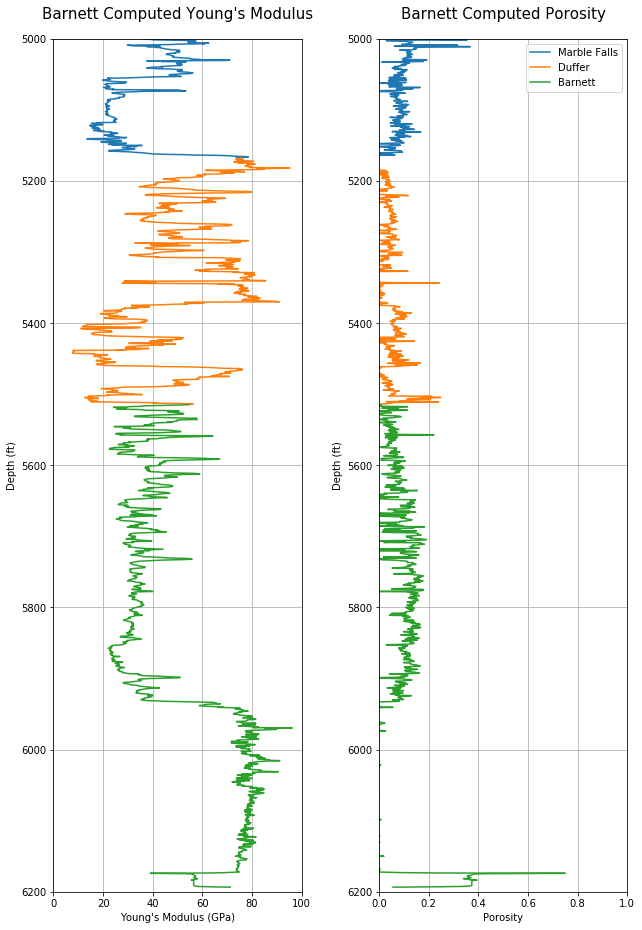

In [0]:
# plot the computed young's modulus and porosity for the clipped zones
plt.figure(figsize=(9, 13))

plt.subplot(1,2,1)
p1 = plt.plot(E_marble_zone, depth_marble_zone)
p2 = plt.plot(E_duffer_zone, depth_duffer_zone)
p3 = plt.plot(E_barnett_zone, depth_barnett_zone)

plt.title("Barnett Computed Young's Modulus", pad=20, size=15)
plt.xlabel("Young's Modulus (GPa)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
p1 = plt.plot(poro_marble_zone, depth_marble_zone)
p2 = plt.plot(poro_duffer_zone, depth_duffer_zone)
p3 = plt.plot(poro_barnett_zone, depth_barnett_zone)

plt.title("Barnett Computed Porosity", pad=20, size=15)
plt.legend((p1[0], p2[0], p3[0]), (['Marble Falls', 'Duffer', 'Barnett']))
plt.xlabel("Porosity"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(5000, 6200)
plt.gca().invert_yaxis()

plt.tight_layout(pad=1.0) # set distance between two plots

Estimated from **Sonic Logs**:
* Marble Falls: $UCS=0.4067 E^{0.51}$ (Eq 22)
* Duffer: $UCS=2.4 E^{0.34}$ (Eq 23)
* Barnett: $UCS=0.0528 E^{0.712}$ 

Estimated from **Density Logs**:
* Marble Falls: $UCS=135.9 e^{-4.8φ}$
* Duffer: $UCS=135.9 e^{-4.8φ}$
* Barnett: $UCS=1.001φ^{-1.143}$

In [0]:
# compute UCS 'from sonic log' empirical equations
# different equations for different zones
# convert E from GPa to MPa (*1E+03)

ucs_marble_zone_sonic = 0.4067 * ((E_marble_zone * 1E+03)**0.51)
ucs_duffer_zone_sonic = 2.4 * ((E_duffer_zone * 1E+03)**0.34)
ucs_barnett_zone_sonic = 0.0528 * ((E_barnett_zone * 1E+03)**0.712)

# compute UCS 'from density log' empirical equations

ucs_marble_zone_rhob = 135.9 * np.exp(-4.8 * poro_marble_zone)
ucs_duffer_zone_rhob = 135.9 * np.exp(-4.8 * poro_duffer_zone)
ucs_barnett_zone_rhob = 1.001 * (poro_barnett_zone**(-1.143))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


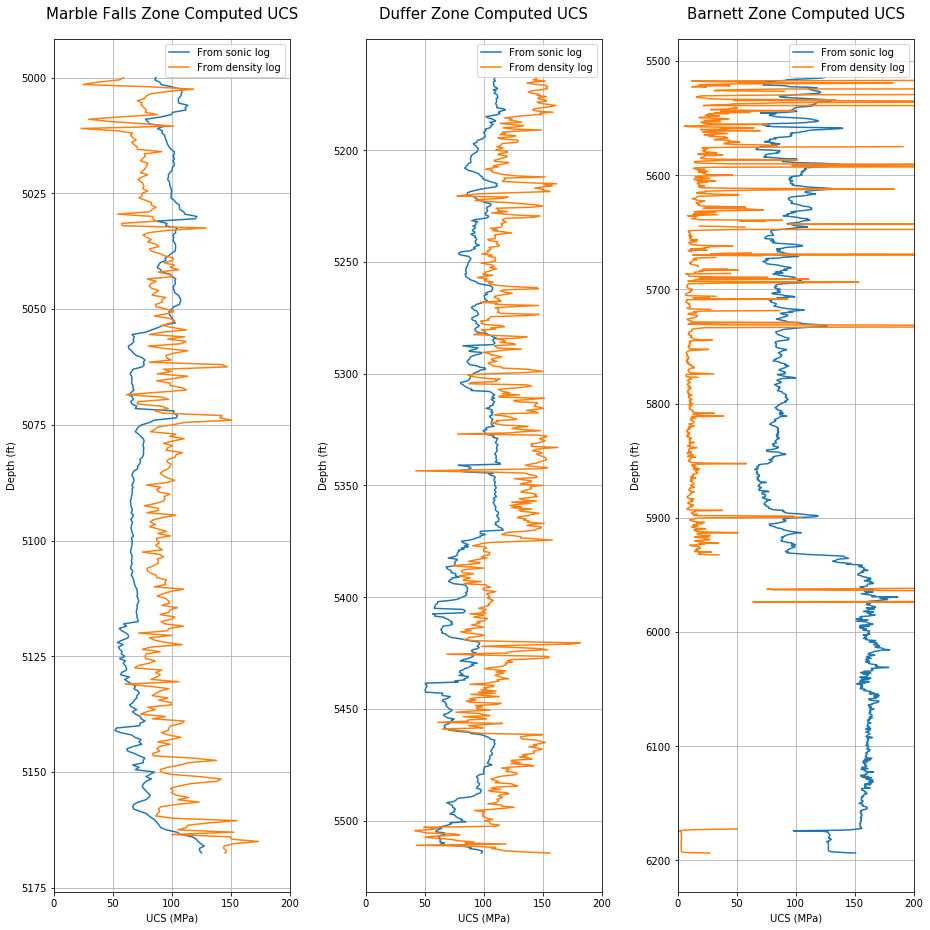

In [0]:
# plot the computed UCS from 'sonic' and 'density' log empirical equations
plt.figure(figsize=(13,13))

plt.subplot(1,3,1)
p1 = plt.plot(ucs_marble_zone_sonic, depth_marble_zone)
p2 = plt.plot(ucs_marble_zone_rhob, depth_marble_zone)
plt.title("Marble Falls Zone Computed UCS", pad=20, size=15)
plt.legend((p1[0], p2[0]), (['From sonic log', 'From density log']))
plt.xlabel("UCS (MPa)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.xlim(0, 200)
# plt.ylim(5000, 6200)
plt.gca().invert_yaxis()

plt.subplot(1,3,2)
p1 = plt.plot(ucs_duffer_zone_sonic, depth_duffer_zone)
p2 = plt.plot(ucs_duffer_zone_rhob, depth_duffer_zone)
plt.title("Duffer Zone Computed UCS", pad=20, size=15)
plt.legend((p1[0], p2[0]), (['From sonic log', 'From density log']))
plt.xlabel("UCS (MPa)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.xlim(0, 200)
# plt.ylim(5000, 6200)
plt.gca().invert_yaxis()

plt.subplot(1,3,3)
p1 = plt.plot(ucs_barnett_zone_sonic, depth_barnett_zone)
p2 = plt.plot(ucs_barnett_zone_rhob, depth_barnett_zone)
plt.title("Barnett Zone Computed UCS", pad=20, size=15)
plt.legend((p1[0], p2[0]), (['From sonic log', 'From density log']))
plt.xlabel("UCS (MPa)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.xlim(0, 200)
# plt.ylim(5000, 6200)
plt.gca().invert_yaxis()

plt.tight_layout(pad=1.0) # set distance between two plots

## Part 2. Questions

### 1a. What is a compressional wave velocity from sonic logs at a depth of 5080 feet in m/s?

In [0]:
id_depth_1a = np.int64(np.where(depth_barnett == 5080)).item()
print("Vp at depth:", depth_barnett[id_depth_1a], "ft is:", vp_barnett[id_depth_1a], "m/s")

Vp at depth: 5080.0 ft is: 3539.8230088495575 m/s


### 1b. What is a shear wave velocity from sonic logs at a depth of 5465 feet in m/s?


In [0]:
id_depth_1b = np.int64(np.where(depth_barnett == 5465)).item()
print("Vs at depth:", depth_barnett[id_depth_1b], "ft is:", vs_barnett[id_depth_1b], "m/s")

Vs at depth: 5465.0 ft is: 3279.8139717062245 m/s


### 1c. What is a Young's modulus at a depth of 5800 feet in MPa?

In [0]:
id_depth_1c = np.int64(np.where(depth_barnett == 5800)).item()
print("E at depth:", depth_barnett[id_depth_1c], "ft is:", E_barnett[id_depth_1c], "psi")

E at depth: 5800.0 ft is: 33.389824136285206 MPa


### 1d. What is the value of the unconfined compressive strength estimated from sonic logs for the Marble Falls Formation at 5080 feet depth in psi?

In [0]:
id_depth_1d = np.int64(np.where(depth_marble_zone == 5080)).item()
print("UCS at Marble Falls Fm at depth:", depth_marble_zone[id_depth_1d], "ft is:", ucs_marble_zone_sonic[id_depth_1d] * 145, "psi")

UCS at Marble Falls Fm at depth: 5080.0 ft is: 11074.137853456146 psi


### 1e. What is the value of the unconfined compressive strength estimated from density logs for the Marble Falls Formation at 5080 feet depth in psi? 

In [0]:
id_depth_1e = np.int64(np.where(depth_marble_zone == 5080)).item()
print("UCS at Marble Falls Fm at depth:", depth_marble_zone[id_depth_1e], "ft is:", ucs_marble_zone_rhob[id_depth_1e] * 145, "psi")

UCS at Marble Falls Fm at depth: 5080.0 ft is: 13982.953227046837 psi


### 1f. What is the value of the unconfined compressive strength estimated from sonic logs for the Duffer Formation at 5465 feet depth in psi?

In [0]:
id_depth_1f = np.int64(np.where(depth_duffer_zone == 5465)).item()
print("UCS at Duffer Fm at depth:", depth_duffer_zone[id_depth_1f], "ft is:", ucs_duffer_zone_sonic[id_depth_1f] * 145, "psi")

UCS at Duffer Fm at depth: 5465.0 ft is: 15754.961610965394 psi


### 1g. What is the value of the unconfined compressive strength estimated from density logs for the Duffer Formation at 5465 feet depth in psi?

In [0]:
id_depth_1g = np.int64(np.where(depth_duffer_zone == 5465)).item()
print("UCS at Duffer Fm at depth:", depth_duffer_zone[id_depth_1g], "ft is:", ucs_duffer_zone_rhob[id_depth_1g] * 145, "psi")

UCS at Duffer Fm at depth: 5465.0 ft is: 22067.839314586145 psi


### 1h. What is the value of the unconfined compressive strength estimated from sonic logs for the Barnett Formation at 5800 feet depth in psi?

In [0]:
id_depth_1h = np.int64(np.where(depth_barnett_zone == 5800)).item()
print("UCS at Barnett Fm at depth:", depth_barnett_zone[id_depth_1h], "ft is:", ucs_barnett_zone_sonic[id_depth_1h] * 145, "psi")

UCS at Barnett Fm at depth: 5800.0 ft is: 12729.612585748995 psi


1i. What is the value of the unconfined compressive strength estimated from density logs for the Barnett Formation at 5800 feet depth in psi?

In [0]:
id_depth_1i = np.int64(np.where(depth_barnett_zone == 5800)).item()
print("UCS at Barnett Fm at depth:", depth_barnett_zone[id_depth_1i], "ft is:", ucs_barnett_zone_rhob[id_depth_1i] * 145, "psi")

UCS at Barnett Fm at depth: 5800.0 ft is: 1883.8735566885484 psi


# ***

In [0]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
c = pd.DataFrame({"a": a, "b": b})

cliplow = 4
cliphigh = 8

d = c.iloc[cliplow:(cliphigh+1)] 

e = a[cliplow:(cliphigh+1)]
e

[5, 6, 7, 8, 9]